# ESTUDIO CÉLULA DURANTE UN DÍA 

In [1]:
import module_Cell as cell
import module_AoiGrids as gr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline as interp

In [2]:
caracteristics_module={    
    'tilt':30,
    'surface_azimuth':180,
    'radius':0.6,
    'area':179*10**-6
    }

In [3]:
caracteristics_place={
    'lat':40.544,
    'lon':-3.613,
    'tz':'Europe/Madrid',
    'date':'2021-06-21',
    }

### SE ESTUDIAN LAS FUNCIONES PARA CADA AOI RESPECTO EL DESPLAZAMIENTO YSE GUARDAN EN FORMA DE FUNCIÓN

In [4]:
desp=np.arange(-6, 6, 0.1)

In [5]:
f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60=cell.function(desp,caracteristics_module['radius'])

In [6]:
data_location=gr.get_data_location(caracteristics_place,caracteristics_module,caracteristics_place['date']) 

### ESTUDIO CÉLULA TODO GENERACIÓN FOTOVOLTAICA

Se asume que todo la irradiación se usa para generación fotovoltaica y asumimos un día ideal sin nubes



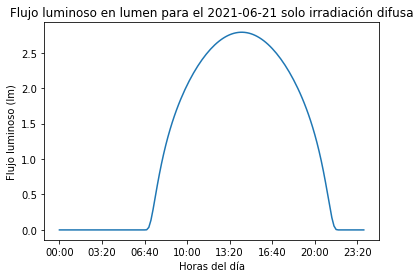

In [7]:
lum_only_diff=cell.from_rad_to_lum(data_location['POA_diffuse'],caracteristics_module['area'])
lum_only_diff.plot(label='iluminación modulo ')

plt.xlabel('Horas del día')
plt.ylabel('Flujo luminoso (lm)')
plt.title("Flujo luminoso en lumen para el "+ caracteristics_place['date']+" solo irradiación difusa")

plt.show()

### ESTUDIO CELULA SIN MOVIMIENTO

In [8]:
lum_no_mov_=[]

for i in range(len(data_location['AOI'])):
    irrad_distribution=cell.performance_curve(0,data_location['AOI'][i],f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60)*data_location['POA_direct'][i]
    lum_no_mov_.append(cell.from_pot_to_lum(float(irrad_distribution)))
    
lum_no_mov=lum_no_mov_+cell.from_rad_to_lum(data_location['POA_diffuse'],caracteristics_module['area'])

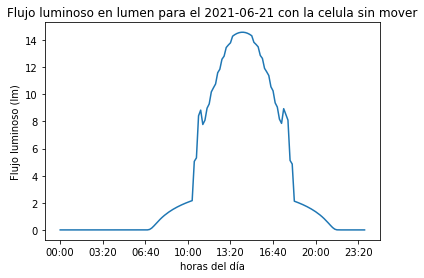

In [9]:
lum_no_mov.plot(label='iluminación modulo ')
plt.xlabel('horas del día')
plt.ylabel('Flujo luminoso (lm)')
plt.title("Flujo luminoso en lumen para el "+ caracteristics_place['date']+ " con la celula sin mover")

plt.show()

### ESTUDIO CÉLULA CON MOVIMIENTO

Suponemos un caso: se decide que cada unidad célula-lente emita un máximo de 5lm de forma constante

In [10]:
lm_goal=5
lm_mov_=[]
desp_cell_=[]
performance=[]
for i in range(len(data_location['AOI'])):
    desp_,illum=cell.adjust(lm_goal,data_location['AOI'][i],caracteristics_module['area'],data_location['POA_direct'][i],data_location['POA_diffuse'][i],f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60)
    performance.append(cell.performance_curve(desp_,data_location['AOI'][i],f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60)*100/f_0(desp).max())
    lm_mov_.append(illum)
    desp_cell_.append(desp_)

lm_mov=pd.Series(lm_mov_)
lm_mov.index=data_location['times'].index
desp_cell=pd.Series(desp_cell_)
desp_cell.index=data_location['times'].index

In [11]:
performance_illum=pd.Series(performance)

performance_illum.index=data_location['times'].index
performance_elec=100-performance_illum

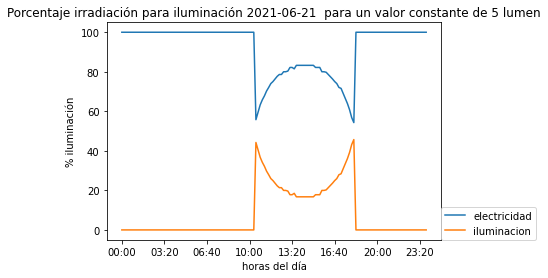

In [12]:
performance_elec.plot(label='electricidad')
performance_illum.plot(label='iluminacion')

plt.xlabel('horas del día')
plt.ylabel('% iluminación')
plt.title("Porcentaje irradiación para iluminación "+ caracteristics_place['date']+ "  para un valor constante de "+str(lm_goal)+" lumen")
plt.xlabel('horas del día')
plt.ylabel('% iluminación')
plt.title("Porcentaje irradiación para iluminación "+ caracteristics_place['date']+ "  para un valor constante de "+str(lm_goal)+" lumen")
plt.legend(loc=(1.0, 0))
plt.show()

Obtenemos los W/m2 que se consiguen:

In [13]:
electricidad=data_location['POA_direct']*performance_elec/100
total_irrad_elec=electricidad.sum()/6
print("A lo largo del día se obtienen ",total_irrad_elec," W/m2 para energía fotovoltaica")

A lo largo del día se obtienen  4801.473281552633  W/m2 para energía fotovoltaica


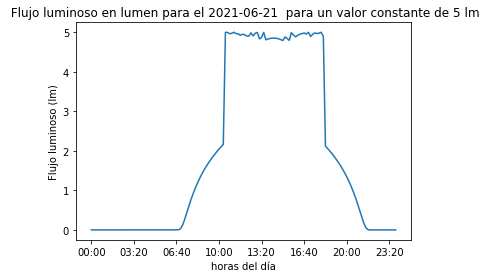

In [14]:
lm_mov.plot(label='iluminación modulo ')
plt.xlabel('horas del día')
plt.ylabel('Flujo luminoso (lm)')
plt.title(" Flujo luminoso en lumen para el "+ caracteristics_place['date']+ "  para un valor constante de "+str(lm_goal)+" lm")
plt.show()

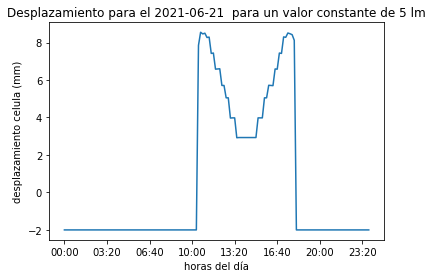

In [15]:
desp_cell.plot(label='iluminación modulo ')
plt.xlabel('horas del día')
plt.ylabel('desplazamiento celula (mm)')
plt.title("Desplazamiento para el "+caracteristics_place['date']+"  para un valor constante de "+str(lm_goal)+" lm")

plt.show()

# ESTUDIO CÉLULA DURANTE UN AÑO: 2020

In [16]:
date=np.array('2021-01-01', dtype=np.datetime64)
date= date + np.arange(365)

In [17]:
illum_module_year_=[]
Index=[]
for day in date:
    data_location=gr.get_data_location(caracteristics_place,caracteristics_module,day) 
    for i in range(len(data_location['AOI'])):
        irrad_distribution=cell.performance_curve(0,data_location['AOI'][i],f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60)*data_location['POA_direct'][i]
        illum_module_year_.append(cell.from_pot_to_lum(float(irrad_distribution))+cell.from_rad_to_lum(data_location['POA_diffuse'][i],caracteristics_module['area']))
        
        Index.append(data_location['times'][i])
    

illum_module_year=pd.Series(illum_module_year_)
illum_module_year.index=Index

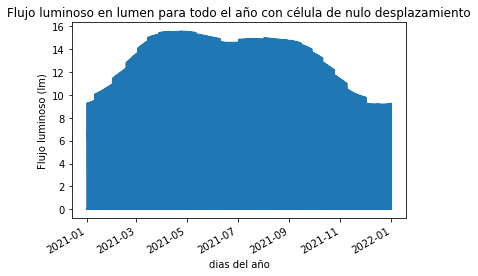

In [18]:
illum_module_year.plot()
plt.xlabel('dias del año')
plt.ylabel('Flujo luminoso (lm)')
plt.title("Flujo luminoso en lumen para todo el año con célula de nulo desplazamiento")
plt.show()

### ESTUDIO CONSTANTE 5 LUMEN

In [19]:
lm_goal=5
lm_year_=[]
desp_cell_year_=[]
Index=[]
hsp_year_=[]
for day in date:
    data_location=gr.get_data_location(caracteristics_place,caracteristics_module,day)
    performance=[]
    for i in range(len(data_location['AOI'])):
        desp_,lum=cell.adjust(lm_goal,data_location['AOI'][i],caracteristics_module['area'],data_location['POA_direct'][i],data_location['POA_diffuse'][i],f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60)
        performance.append(cell.performance_curve(desp_,data_location['AOI'][i],f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60)*100/f_0(desp).max())
        lm_year_.append(lum)
        desp_cell_year_.append(desp_)
        Index.append(data_location['times'][i])
        
    performance_ilum=pd.Series(performance)
    performance_ilum.index=data_location['times'].index
    performance_el=100-performance_ilum    
    electricity=data_location['POA_direct']*performance_el/100
    
    hps_equiv=electricity.sum()/6000
    hsp_year_.append(hps_equiv)
    
   
    
lm_year=pd.Series(lm_year_)
lm_year.index=Index
desp_cell_year=pd.Series(desp_cell_year_)
desp_cell_year.index=Index



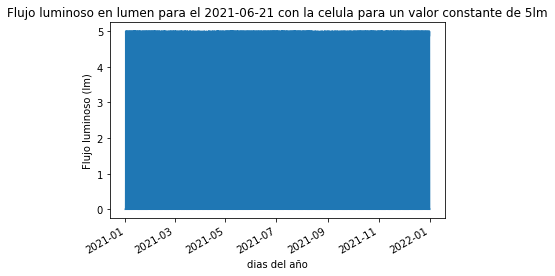

In [20]:
lm_year.plot(label='iluminación modulo ')
plt.xlabel('dias del año')
plt.ylabel('Flujo luminoso (lm)')
plt.title("Flujo luminoso en lumen para el "+ caracteristics_place['date']+ " con la celula para un valor constante de "+str(lm_goal)+"lm")
plt.show()

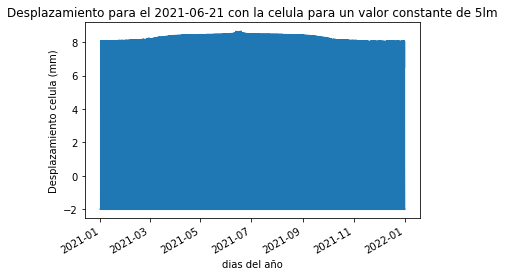

In [21]:
desp_cell_year.plot(label='iluminación modulo ')
plt.xlabel('dias del año')
plt.ylabel('Desplazamiento celula (mm)')
plt.title("Desplazamiento para el "+caracteristics_place['date']+" con la celula para un valor constante de "+str(lm_goal)+"lm")

plt.show()

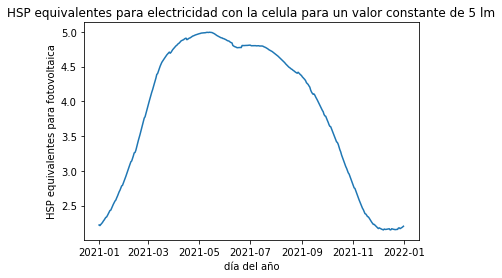

In [22]:
plt.plot(date,hsp_year_)
plt.xlabel('día del año')
plt.ylabel('HSP equivalentes para fotovoltaica')
plt.title("HSP equivalentes para electricidad con la celula para un valor constante de "+str(lm_goal)+" lm")

plt.show()

Se pueden comparar estas HSP equivalentes con las HSP que se obtendrían de forma normal

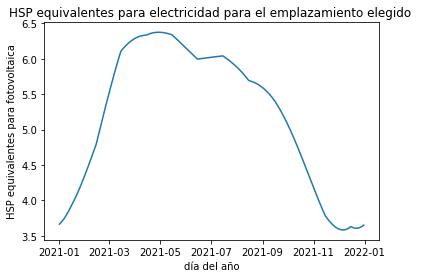

In [23]:
hsp_year_mo_lm=[]
for day in date:
    data_location=gr.get_data_location(caracteristics_place,caracteristics_module,day)    
    hsp_year_mo_lm.append(data_location['POA_direct'].sum()/6000)
    
   


plt.plot(date,hsp_year_mo_lm)
plt.xlabel('día del año')
plt.ylabel('HSP equivalentes para fotovoltaica')
plt.title("HSP equivalentes para electricidad para el emplazamiento elegido ")

plt.show()